In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from pathlib import Path
import gzip, pickle, matplotlib as mpl, matplotlib.pyplot as plt
from random import random
import os

In [2]:
MNIST_URL = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [3]:
!ls ../data

mnist.pkl.gz


In [4]:
!ls 

README.md     _site	 lesson_10	 lesson_9_files
_publish.yml  data	 lesson_9.ipynb  mm-foundations.ipynb
_quarto.yml   index.qmd  lesson_9.pdf


In [5]:
!cat README.md

# fastai_course_artifacts


In [6]:
from urllib.request import urlretrieve
if not path_gz.exists():
    urlretrieve(MNIST_URL, path_gz)

In [7]:
#context manager with destructuring
with gzip.open(path_gz, 'rb') as f:
    ((x_train, y_train),(x_valid, y_valid),_) = pickle.load(f, encoding='latin-1')

In [8]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [15]:
len(lst1)

784

In [7]:
def chunks(x, sz):
    for i in range (0,len(x),sz):
        yield x[i:i+sz]

`yield` goes from 0 to the length of x, my list which has a value of 10 in this case but jumps by the size of `sz` which is 5 in my case, meaning it returns the value from 0 to 5, then the next 0 to 5.

Basically `yield` creates an iterator, something you can call `next` on till the list values are done as shown below.

In [8]:
list(chunks(vals,5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

In [9]:
len(lst1)

784

In [10]:
val_iter = chunks(vals,5)
val_iter

<generator object chunks at 0x7bc4dd5e14d0>

`val_iter` is a generator object, which is a special type of function that returns an iterator object. Instead of using `return`, we use `yield` as seen above which returns values in chunks by printing values of the specified length and then pausing execution.

In [11]:
next(val_iter)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [12]:
next(val_iter)

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [13]:
next(val_iter)

StopIteration: 

In [ ]:
val_iter = chunks(vals,5)
list(val_iter)

In [14]:
type(lst1)

list

In [15]:
chunks??

Signature: chunks(x, sz)
Docstring: <no docstring>
Source:   
def chunks(x, sz):
    for i in range (0,len(x),sz):
        yield x[i:i+sz]
File:      /tmp/ipykernel_867/385485518.py
Type:      function

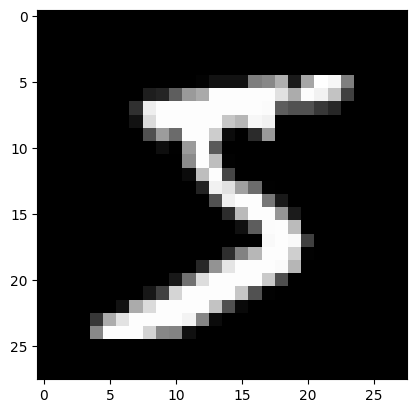

In [16]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1,28)));

`rcParams`, runtime configuration parameters are used to customize the styling. This takes precedence over other ways of customizing the styling of our plots. Above, we are setting up our plot to be grayscale.

Putting `chunks(lst1,28)` inside a list forces the generator object to return all the chunkified results at once, as we shall demonstrate below. To quote Jeremy Howard, if you pass the iterator to a list, it runs through the entire iterator until it is finished and creates a list of the results.

For the demo, I will use a smaller version of `lst1` to keep everything viewable.

In [17]:
val_iter_a = lst1[200:210]
(list(chunks(val_iter_a,5)))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

We can take any list like our `vals` and `lst1` and create an iterator by passing it to `iter`.

In [18]:
from itertools import islice

In [19]:
it = iter(vals)
it

In [20]:
next(it)

0.0

In [21]:
next(it)

0.0

In [22]:
iter??

Docstring:
iter(iterable) -> iterator
iter(callable, sentinel) -> iterator

Get an iterator from an object.  In the first form, the argument must
supply its own iterator, or be a sequence.
In the second form, the callable is called until it returns the sentinel.
Type:      builtin_function_or_method

In [23]:
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [24]:
is_it = islice(vals,5)

In [25]:
next(is_it)

0.0

In [26]:
next(is_it)

0.0

In [27]:
next(is_it)

0.0

In [28]:
next(is_it)

0.19140625

In [29]:
next(is_it)

0.9296875

In [30]:
next(is_it)

StopIteration: 

In [31]:
islice??

Init signature: islice(self, /, *args, **kwargs)
Docstring:     
islice(iterable, stop) --> islice object
islice(iterable, start, stop[, step]) --> islice object

Return an iterator whose next() method returns selected values from an
iterable.  If start is specified, will skip all preceding elements;
otherwise, start defaults to zero.  Step defaults to one.  If
specified as another value, step determines how many values are
skipped between successive calls.  Works like a slice() on a list
but returns an iterator.
Type:           type
Subclasses:     

`islice` grabs the first n things from an iterable, in this case we set stop to be 5, so we grab the first 5 things.

In [32]:
is_it = islice(vals,5)
list(is_it)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [33]:
list(is_it)

[]

In [34]:
callable(list)

True

`iter` in its second form,`iter(callable, sentinel, /)` has the ability to invoke a callable until the output of the sentinel value is reached. We shall see this below.

We can use this to recreate our `chunks` function with `islice`

In [35]:
it = iter(lst1)
it

A [lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) function is one that is anonymous, i.e., a function with no name, just like `def` is used to define a normal function in Python, lambda is used to define an anonymous function. It takes in an argument and a single expression for example *lambda arguments : expression*

In [36]:
name = 'silver rubanza'
caps_name = lambda func: func.upper()
caps_name(name),caps_name('devontay')

('SILVER RUBANZA', 'DEVONTAY')

In [37]:
sum_lmd = lambda a,b: a+b
sum_lmd(1,2)

3

In [38]:
#len(list(it))

In [39]:
len(lst1)

784

In [40]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it,28)),[]))

In [41]:
#next(iter(lambda: list(islice(it,28)),[]))

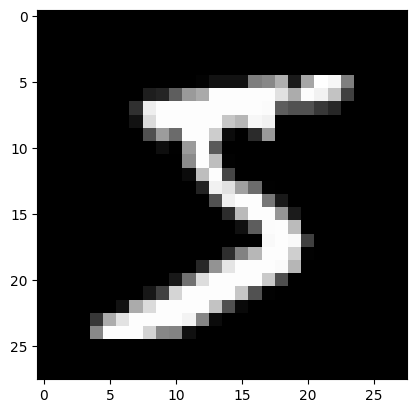

In [42]:
plt.imshow(img)

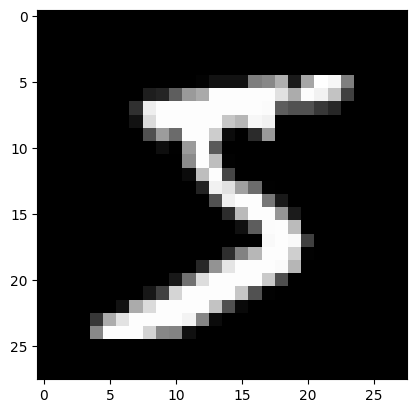

In [43]:
def plot_w_islice(x):
    return list(iter(lambda: list(islice(it,28)),[]))
it = iter(lst1)
plt.imshow(plot_w_islice(img))

In [44]:
def plot_wt_slice(x):
    return list(islice(x,28))

it = iter(lst1)
plot_wt_slice(it)


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

### Matrix and tensors

In [45]:
img[27][27]

0.0

In [46]:
img[20,10]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
id(img)

In [47]:
type(img)

list

We can create a class that enables us to use the form `img[20,10]`to return a value at that point for a matrix just like we would in Numpy. 

Object-oriented programming is a paradigm that revolves around using objects and relationships between objects to represent data in Python. This involves defining objects and interacting with them.

A python object is an instance of a class, made up of an identity (Id), a type and a value. The id is the address of an object in memory and cannot be changed. These objects can be used to represent real world entities like a button or a car 

An object also has a type which determines what operations we can do on that particular object and defines what possible values objects of that type can take on, we can get the type by using `type`. just like id, type is unchangeable.

Objects whose value can change are called mutable and immutable for the vice versa. An immutable object can have a mutable object inside, meaning its value might change, but the object inside the immutable object itself remains unchanged.

Objects that contain references to other objects are called containers, for example, a list.
Python [types](https://docs.python.org/3/reference/datamodel.html#the-standard-type-hierarchy) includes things like `None`, `numbers.Number` and, `custom classes`.

We can use classes to define, initialize, and manipulate objects, serving as templates to create objects. It defines and structures all objects created.

Methods and constructors are used to create and define classes. Methods are functions within a class that are used to perform a specific task. There are 2 types of methods, user-defined methods and special methods commonly known as dunder methods.

dunder methods are implicit functions with a double underscore in between the method name. These are used to add extra functionality to classes. They are implicitly called when needed by a running program for example, when we call print, it automatically calls the `__str__`method.

User-defined methods are defined by the user to perform a specific task for example our `Cows` class could have a `milk()` method.

A constructor is a special method that the program calls upon the object's creation, this helps initialize the class object with attributes for example in our if we have a function for Cows, we can use a constructor like `__init` to create characteristics for the Cow as we shall see below.`__init` is only called during the creation of a class with a sole purpose of initializing the class attributes.


Class Illustration

In [48]:
class Cows:
    """
    A class representing different cow breeds

    Parameters:
    breed: The breed of a cow
    age: The cows age
    weight: The weight of a cow
    color: The color of a cow

    Returns:
    The attributes of a particular breed of cow
    """
    def __init__(self,breed,age,weight,color):
        self.breed= breed
        self.age = age
        self.weight = weight
        self.color = color 

In [49]:
Cows??

Init signature: Cows(breed, age, weight, color)
Docstring:     
A class representing different cow breeds

Parameters:
breed: The breed of a cow
age: The cows age
weight: The weight of a cow
color: The color of a cow

Returns:
The attributes of a particular breed of cow
Type:           type
Subclasses:     

In [50]:
#create an object / instance of a cow
fresian = Cows("Fresian",4,600,"Distinctive black and white patches in irregular patterns")
fresian

Access attributes

In [51]:
fresian.breed, fresian.age, fresian.weight

('Fresian', 4, 600)

In [52]:
class Cows_dp_a:
    """
    A class representing different cow breeds

    Parameters:
    breed: The breed of a cow
    age: The cows age
    weight: The weight of a cow
    color: The color of a cow

    Returns:
    The attributes of a particular breed of cow
    """
    def __init__(self):
        self.breed = "Jersey"
        self.age = 5
        self.weight = 700
        self.color = "White Patched"

In [53]:
Jersey = Cows_dp_a()
Jersey.breed, Jersey.age, Jersey.weight, Jersey.color

('Jersey', 5, 700, 'White Patched')

Using default parameters 

In [54]:
class Cows_dp:
    """
    A class representing different cow breeds

    Parameters:
    breed: The breed of a cow
    age: The cows age
    weight: The weight of a cow
    color: The color of a cow

    Returns:
    The attributes of a particular breed of cow
    """
    def __init__(self,breed = "Heifer", age = 5, weight = 600, color = "Black"):
        self.breed= breed
        self.age = age
        self.weight = weight
        self.color = color 

In [55]:
Heifer = Cows_dp()
Heifer.breed

'Heifer'

In [56]:
class Matrix:
    def __init__(self,xs): self.xs = xs
    def __getitem__(self,idxs): return self.xs[idxs[0]][idxs[1]]

In [57]:
img[20][15]

0.98828125

In [58]:
m = Matrix(img)
m[20,15]

0.98828125

`__getitem__` allows us to access elements of an object using square brackets. We can use this to access particular elements from a list just like we would do with `img[20][15]`

In [59]:
class MyList:
    def __init__(self, data):
        self.data = data
    
    def __getitem__(self, index):
        return self.data[index[0]] [index[1]]

# Create an instance of MyList
a = MyList([[1, 7, 3, 4, 5],[1, 9, 3, 4, 5],[1, 6, 3, 4, 5]])

# Accessing items using square brackets
print(a[2,1])

6


In [8]:
import torch
from torch import tensor
import numpy as np

In Numpy and PyTorch, You can set the display options to be used when printing output to the screen using `set_printoptions`. We can see the function definition below by adding a `?` at the end of the method name.

In [61]:
torch.set_printoptions?

Signature:
torch.set_printoptions(
    precision=None,
    threshold=None,
    edgeitems=None,
    linewidth=None,
    profile=None,
    sci_mode=None,
)
Docstring:
Set options for printing. Items shamelessly taken from NumPy

Args:
    precision: Number of digits of precision for floating point output
        (default = 4).
    threshold: Total number of array elements which trigger summarization
        rather than full `repr` (default = 1000).
    edgeitems: Number of array items in summary at beginning and end of
        each dimension (default = 3).
    linewidth: The number of characters per line for the purpose of
        inserting line breaks (default = 80). Thresholded matrices will
        ignore this parameter.
    profile: Sane defaults for pretty printing. Can override with any of
        the above options. (any one of `default`, `short`, `full`)
    sci_mode: Enable (True) or disable (False) scientific notation. If
        None (default) is specified, the value is defined

In [62]:
np.set_printoptions?

Signature:
np.set_printoptions(
    precision=None,
    threshold=None,
    edgeitems=None,
    linewidth=None,
    suppress=None,
    nanstr=None,
    infstr=None,
    formatter=None,
    sign=None,
    floatmode=None,
    *,
    legacy=None,
)
Docstring:
Set printing options.

These options determine the way floating point numbers, arrays and
other NumPy objects are displayed.

Parameters
----------
precision : int or None, optional
    Number of digits of precision for floating point output (default 8).
    May be None if `floatmode` is not `fixed`, to print as many digits as
    necessary to uniquely specify the value.
threshold : int, optional
    Total number of array elements which trigger summarization
    rather than full repr (default 1000).
    To always use the full repr without summarization, pass `sys.maxsize`.
edgeitems : int, optional
    Number of array items in summary at beginning and end of
    each dimension (default 3).
linewidth : int, optional
    The number of 

In [63]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
np.set_printoptions(precision=2, linewidth=140)

In [64]:
tens = tensor(img)
tens[20,15]

tensor(0.99)

In [65]:
tens[20][15]

tensor(0.99)

In [9]:
x_train,y_train,x_valid,y_valid = map(tensor,(x_train,y_train,x_valid,y_valid))

In [67]:
x_train.shape

torch.Size([50000, 784])

In [68]:
map??

Init signature: map(self, /, *args, **kwargs)
Docstring:     
map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.
Type:           type
Subclasses:     

In [69]:
x_train.type()

'torch.FloatTensor'

Tensors

In [70]:
len(lst1)

784

In [71]:
lst1_tens = tensor(lst1)
img_ex = lst1_tens.reshape(-1,28,28)
img_ex.shape

torch.Size([1, 28, 28])

In [72]:
imgs = x_train.reshape(-1,28,28)
imgs.shape

torch.Size([50000, 28, 28])

In [73]:
imgs[0].shape

torch.Size([28, 28])

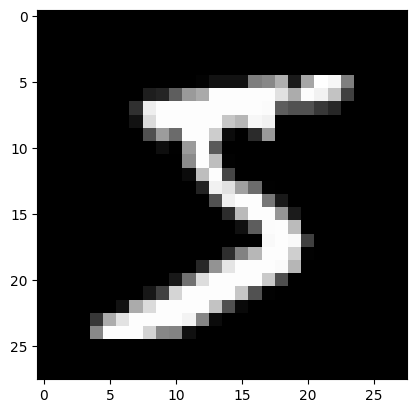

In [74]:
plt.imshow(imgs[0])

In [75]:
imgs[0,20, 15]

tensor(0.99)

### Random number generator
Below we shall implement a pseudo random number generator based on the Wichman-hill algorithm used before Python 2.3.

In [76]:
rnd_state = None 
def seed(a):
    global rnd_state
    a,x = divmod(a, 30268)
    a,y = divmod(a, 30306)
    a,z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [77]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

Let me break down the above to show what is happening behind the scenes

In [78]:
r,s = divmod(457428938475, 30268)
r,s

(15112625, 4975)

In [79]:
t,u = divmod(r, 30306)
t,u

(498, 20237)

In [80]:
v,w = divmod(t, 30322)
v,w

(0, 498)

In [81]:
a,b,c = int(s)+1, int(u)+1, int(w)+1
a,b,c

(4976, 20238, 499)

In [82]:
divmod??

Signature: divmod(x, y, /)
Docstring: Return the tuple (x//y, x%y).  Invariant: div*y + mod == x.
Type:      builtin_function_or_method

In [83]:
def rand():
    global rnd_state
    x,y,z = rnd_state
    x = (171*x) % 30269
    y = (172*y) % 30307
    z = (170*z) % 30323
    rnd_state = x,y,z 
    return (x/30269 + y/30307 + z/30323)%1.0

In [84]:
rand(),rand(),rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

Now every time I run `rand()`, it should give me a different result.

Let me break it down below

In [85]:
x,y,z = rnd_state
x,y,z,a,b,c

(22743, 6859, 2773, 4976, 20238, 499)

In [86]:
(171*x),(172*y), (170*z)

(3889053, 1179748, 471410)

In [87]:
x = (171*x) % 30269
y = (172*y) % 30307
z = (170*z) % 30323
rnd_state = x,y,z
x,y,z

(14621, 28082, 16565)

In [88]:
(x/30269 + y/30307 + z/30323)%1.0

0.9559050644103264

In [89]:
(x/30269 + y/30307 + z/30323)%1.0

0.9559050644103264

In [90]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In Child: {rand()}')
    os._exit(os.EX_OK)

In Child: 0.840065633394744
In parent: 0.840065633394744


In [91]:
import torch
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In Child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.20])
In Child: tensor([0.20])


In [92]:
import numpy as np
if os.fork(): print(f'In parent: {np.random.rand()}')
else:
    print(f'In Child: {np.random.rand()}')
    os._exit(os.EX_OK)

In parent: 0.1857109175669589
In Child: 0.1857109175669589


In [93]:
if os.fork(): print(f'In parent: {random()}')
else:
    print(f'In Child: {random()}')
    os._exit(os.EX_OK)

# Python reinitializes the global random state in each fork

In parent: 0.21943000630505194
In Child: 0.268990753176923


We expect our random numbers not to be correlated or on a linear scale, let us plot 50 random number values and have a look at their distribution.

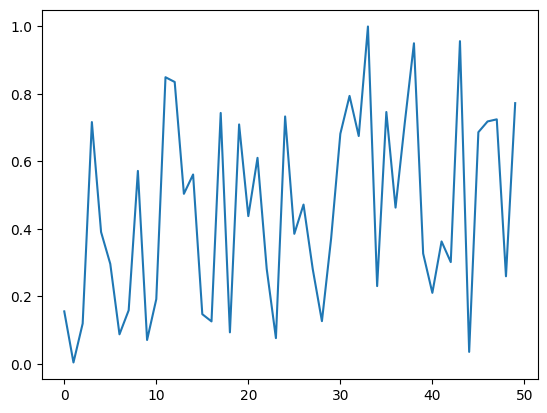

In [94]:
plt.plot([rand() for _ in range(50)]);

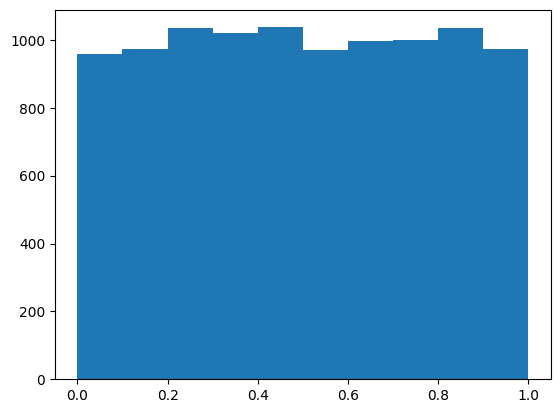

In [95]:
plt.hist([rand() for _ in range(10000)]);

In [96]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)],10))

8.83 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [97]:
%timeit -n 10 torch.rand(784,10)

The slowest run took 5.90 times longer than the fastest. This could mean that an intermediate result is being cached.
144 μs ± 121 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


So above we see that using the torch random generator takes 87.5 µs to run as opposed to our from scratch bare-bones python version which takes 3.66 ms to run, making the PyTorch version much faster, so we shall be using the PyTorch version.

## Matrix Multiplication

In [98]:
x_valid.shape

torch.Size([10000, 784])

PyTorch's `torch` has a variety of methods, which you can find [here](https://docs.pytorch.org/docs/stable/torch.html)

In [99]:
torch.is_tensor(x_valid)

True

In [100]:
torch.manual_seed(1)

In [9]:
weights = torch.randn(784,10)
weights, weights.shape

(tensor([[-0.3894,  0.3368,  2.1075,  ...,  0.5626, -0.5433, -0.1752],
         [-0.0173,  1.3302,  1.7407,  ..., -0.2364, -0.5757, -1.5608],
         [-0.0081, -1.1902,  1.3698,  ..., -1.3941,  0.2248, -0.6989],
         ...,
         [ 0.1516, -0.3841, -1.8467,  ...,  0.1243,  1.7358, -0.6656],
         [-0.8727,  0.0081, -0.1987,  ...,  0.4999,  1.8306, -0.0376],
         [-0.1313, -0.9852,  1.5214,  ...,  0.3691,  1.2518,  0.2696]]),
 torch.Size([784, 10]))

In [10]:
bias = torch.zeros(10)
bias, bias.shape

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), torch.Size([10]))

In [103]:
x_valid.shape

torch.Size([10000, 784])

In [11]:
m1 = x_valid[:5] # mini-batch
m1, m1.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 (5, 784))

In [12]:
m2 = weights
m2, m2.shape

(tensor([[-0.3894,  0.3368,  2.1075,  ...,  0.5626, -0.5433, -0.1752],
         [-0.0173,  1.3302,  1.7407,  ..., -0.2364, -0.5757, -1.5608],
         [-0.0081, -1.1902,  1.3698,  ..., -1.3941,  0.2248, -0.6989],
         ...,
         [ 0.1516, -0.3841, -1.8467,  ...,  0.1243,  1.7358, -0.6656],
         [-0.8727,  0.0081, -0.1987,  ...,  0.4999,  1.8306, -0.0376],
         [-0.1313, -0.9852,  1.5214,  ...,  0.3691,  1.2518,  0.2696]]),
 torch.Size([784, 10]))

In [13]:
m1.shape,m2.shape

((5, 784), torch.Size([784, 10]))

Remember shape is always (rows * columns)

In [14]:
# The below gives us the values we can use to create a loop for our matrix multiplication later on.

ar, ac = m1.shape
br, bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

In [15]:
t1 = torch.zeros(ar, bc)
t1, t1.shape

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 torch.Size([5, 10]))

Now we can loop through our rows and columns to calculate the dot product for our images and weights, resulting in a score that indicates the likelihood of a number being a certain value.

Remember, our x_valid has 5 images, with 784 flattened-out values for each. Our weights have 784 values for each of the 10 output classes. So we do a dot product between these 2 to calculate our likelihoods for each number in each row.

In [109]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t1[i,j] += m1[i,k] * m2[k,j]

`i` iterates through the rows of the 1st matrix in this case `m1`, we then iterate through the columns of the 2nd matrix, `m2`. Finally, we loop through each image and weight matrix pair for all 784 values and calculate the dot product.

In [110]:
t1, t1.shape

(tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
         [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
         [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
         [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
         [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]]),
 torch.Size([5, 10]))

I like to split my code up into different cells to always test it out with output, after this you can always copy these by selecting the cells, copying them with `c` then pasting them with `v`. I can then merge them by clicking the cells, clicking `shift`, highlighting them, and merging them using `shift + m`.

To create a function, add the function definition up top i.e. `def f_name(...,args):`, take out the prints, then select the below code and click `ctrl + ]` to align this into a function format. I do this below for our matrix multiplier.

In [111]:
# The below gives us the values we can use to create a loop for our matrix multiplication later on.
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k] * b[k,j]
    return c

In [16]:
name: str = 'Rubanza'
age: int| float = 29.5
name, age

('Rubanza', 29.5)

In [17]:
!python --version

Python 3.10.12


In [112]:
%time matmul(m1,m2)

CPU times: user 1.67 s, sys: 0 ns, total: 1.67 s
Wall time: 1.67 s


tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [113]:
%time _=matmul(m1,m2)

CPU times: user 1.3 s, sys: 0 ns, total: 1.3 s
Wall time: 1.3 s


`%` is used for line magic, so make sure to put your function on the same line as the `%` otherwise you will get misleading results.

`%%` is used for cell magic, which affects the whole code cell.

In [114]:
timeit matmul(m1,m2)

2.12 s ± 690 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [115]:
#list magic commands
#%lsmagic

In [118]:
# We can use %automagic to make magic functions callable without having to type the initial %
#Toggle to turn on/off
#%automagic


Automagic is ON, % prefix IS NOT needed for line magics.


In [119]:
time _=matmul(m1,m2)

CPU times: user 1.83 s, sys: 2.4 ms, total: 1.83 s
Wall time: 1.83 s


Now our matrix multiplication code takes >940ms to execute for just the 5 digits. TRunning this full whole dataset would take forever to execute. So is there anyway we can do this faster. We can try out a few tricks. 

### [Numba](https://numba.pydata.org/)

Per the Numba website, 

> Numba is an open source JIT compiler that translates a subset of Python and NumPy code into fast machine code.

 
> Numba translates Python functions to optimized machine code at runtime using the industry-standard LLVM compiler library. Numba-compiled numerical algorithms in Python can approach the speeds of C or FORTRAN.
You don't need to replace the Python interpreter, run a separate compilation step, or even have a C/C++ compiler installed. Just apply one of the Numba decorators to your Python function, and Numba does the rest for example

```
from numba import njit
import random

@njit
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples
```

In [120]:
#!uv pip install numba

In [16]:
from numba import njit

In [122]:
@njit
def dot(a,b):
  res = 0.
  for i in range(len(a)):
      res += a[i] * b[i]
  return res

In [123]:
from numpy import array

In [124]:
x = array([1.,2,3])
z = array([2.,3,4])
x.shape,z.shape

((3,), (3,))

In [125]:
%time _=dot(x,z)

CPU times: user 1.66 s, sys: 292 ms, total: 1.96 s
Wall time: 1.63 s


In [126]:
%time _=dot(x,z)

CPU times: user 14 μs, sys: 3 μs, total: 17 μs
Wall time: 21 μs


In [127]:
dot(x,z)

20.0

In [128]:
c = ([1.,2,3])
d = ([2.,3,4])
c,d

([1.0, 2, 3], [2.0, 3, 4])

In [129]:
dot(x,z)

20.0

In [130]:
%time _=matmul(m1,m2)

CPU times: user 2.38 s, sys: 12.7 ms, total: 2.4 s
Wall time: 2.39 s


In [131]:
# The below gives us the values we can use to create a loop for our matrix multiplication later on.
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = dot(a[i,:],b[:,j])
    return c

In [132]:
m1a, m2a = m1.numpy(), m2.numpy()
m1a.shape, m2a.shape

((5, 784), (784, 10))

In [149]:
%time _=matmul(m1a,m2a)

TypeError: can't assign a numpy.float32 to a torch.FloatTensor

In [150]:
%time _=matmul(mla,m2a)

NameError: name 'mla' is not defined

In [156]:
t3 = matmul(m1a,m2a)

TypeError: can't assign a numpy.float32 to a torch.FloatTensor

In [157]:
from fastcore.test import *

In [158]:
test_close(t1,t3)

NameError: name 't3' is not defined

In [159]:
test_close(t1,(matmul(mla,m2a)))

NameError: name 'mla' is not defined

In [154]:
%time _=matmul(mla,m2a)

NameError: name 'mla' is not defined

In [ ]:
%timeit -n 50 matmul(mla,m2a)

In [ ]:
%timeit -n 50 matmul(mla,m2a)

So using njit takes the time it needs to do the same matrix multiplication from 778 ms as seen in our first case down to 79 μs. Quite an improvement

So we can further try to optimize this, let's try using PyTorch for matrix multiplication.

## Elementwise Operations

In [164]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [165]:
a + b

tensor([12., 14.,  3.])

In [166]:
(a<b).float().mean()

tensor(0.67)

In [167]:
m = tensor([[1,2,3],[4,5,6],[7,8,9]]); m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Adding a `.` at the end of one of my figures in the list upcasts all the values to the floating data type. In neural networks, we usually work with floats for a lot of operations.

In [139]:
m = tensor([[1.,2,3],[4,5,6],[7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

#### Frobenius norm 

This is the sum over all rows and columns of a matrix. We take each value and square it, add them up, then take the square root. For example, we can get the Frobenius norm of m by doing the below

In [140]:
sf = (m*m).sum()
sf

tensor(285.)

In [141]:
sf.sqrt()

tensor(16.88)

In [142]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [143]:
m[2],m[2:,],m[:,2]

(tensor([7., 8., 9.]), tensor([[7., 8., 9.]]), tensor([3., 6., 9.]))

We can refactor our `matmul` to use element wise mulitplication as follows

In [144]:
#Barebones Python
def matmul_og(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k] * b[k,j]
    return c


# Elementwise with frobenius norm.
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i,:]*b[:,j]).sum()
    return c

#With Numba
@njit
def dot(a,b):
  res = 0.
  for i in range(len(a)):
      res += a[i] * b[i]
  return res
    
def matmul_dot(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = dot(a[i,:],b[:,j])
    return c


# Using torch.dot
def matmul_td(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = torch.dot(a[i,:],b[:,j])
    return c

def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = 

In [17]:
ar,bc

(5, 10)

In [145]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [146]:
test_close(matmul_dot(m1a,m2a),matmul(m1,m2))

NameError: name 'test_close' is not defined

In [147]:
matmul_dot(m1a,m2a)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [148]:
matmul(m1,m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [ ]:
matmul_td(m1,m2)

In [ ]:
%timeit matmul(m1,m2)

In [ ]:
%timeit -n 50 matmul(m1,m2)

In [ ]:
%timeit matmul_dot(m1a,m2a)

In [ ]:
%timeit matmul_dot(m1a,m2a)

In [ ]:
%timeit matmul_og(m1,m2)

In [ ]:
%timeit matmul_td(m1,m2)

## Broadcasting

#### With a Scalar

In [168]:
a

tensor([10.,  6., -4.])

In [169]:
b_tns = a < 0
b_tns

tensor([False, False,  True])

In [170]:
b_tns.int(),b_tns.float()

(tensor([0, 0, 1], dtype=torch.int32), tensor([0., 0., 1.]))

In [171]:
b_tns*2,a*2

(tensor([0, 0, 2]), tensor([20., 12., -8.]))

#### With a vector and matrix

In [172]:
t1.shape,t1

(torch.Size([5, 10]),
 tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
         [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
         [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
         [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
         [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]]))

In [173]:
ab = tensor([1,2,3,4,5,6,7,8,9,10])

In [174]:
ab+t1

tensor([[    -9.94,      1.32,     -4.00,     -0.01,      2.91,      2.64,     10.91,      4.56,     -2.47,      7.88],
        [    15.54,      8.00,      5.89,     -0.08,     11.59,     -8.74,     -2.28,     10.16,     -6.28,      7.32],
        [     3.22,     -1.22,     -1.80,     -2.05,     19.17,     -2.98,      2.21,      2.56,    -11.68,     23.57],
        [    -5.71,     10.90,     -4.46,     -3.90,      7.70,      1.27,     -4.03,     -4.98,      2.56,     13.64],
        [    -1.44,     -4.40,      0.60,     -5.04,     16.18,      0.23,     -1.92,      4.21,      0.02,     15.28]])

With broadcasting, we are able to multiply a vector with a tensor. What this does behind the scenes is use the `expand_as()` method shown below to increase the shape of the vector to match the shape of the matrix. [`expand_as`](https://docs.pytorch.org/docs/stable/generated/torch.Tensor.expand.html) is an extension of [`torch.Tensor.expand`](https://docs.pytorch.org/docs/stable/generated/torch.Tensor.expand_as.html).

For example, above, when we run ab+1, what this does is run `expand_as` on ab and creates something new, which contains the same values as ab but expanded to match the size of `t1`. Let us illustrate this below.

In [175]:
t2 = ab.expand_as(t1)
t2

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

As you can see above, ab has been expanded to match the size of t1 but with the same values replicated across the 5 rows. From here, it is possible to do element-wise addition for t2 + t1. Interestingly enough, t2 doesn't actually copy all these values into memory, rather it just performs a 0 stride and acts like it is the same shape as t1.

In [176]:
ab.expand_as??

Docstring:
expand_as(other) -> Tensor

Expand this tensor to the same size as :attr:`other`.
``self.expand_as(other)`` is equivalent to ``self.expand(other.size())``.

Please see :meth:`~Tensor.expand` for more information about ``expand``.

Args:
    other (:class:`torch.Tensor`): The result tensor has the same size
        as :attr:`other`.
Type:      builtin_function_or_method

In [177]:
torch.Tensor.expand?

Docstring:
expand(*sizes) -> Tensor

Returns a new view of the :attr:`self` tensor with singleton dimensions expanded
to a larger size.

Passing -1 as the size for a dimension means not changing the size of
that dimension.

Tensor can be also expanded to a larger number of dimensions, and the
new ones will be appended at the front. For the new dimensions, the
size cannot be set to -1.

Expanding a tensor does not allocate new memory, but only creates a
new view on the existing tensor where a dimension of size one is
expanded to a larger size by setting the ``stride`` to 0. Any dimension
of size 1 can be expanded to an arbitrary value without allocating new
memory.

Args:
    *sizes (torch.Size or int...): the desired expanded size

.. warning::

    More than one element of an expanded tensor may refer to a single
    memory location. As a result, in-place operations (especially ones that
    are vectorized) may result in incorrect behavior. If you need to write
    to the tensors, ple

We can change the shape of a vector by adding a unit axis using `unsqueeze()`. For example, we can convert a 1D array to a 2D array. You can also do this by indexing with the special value `None`

In [178]:
a, a.shape

(tensor([10.,  6., -4.]), torch.Size([3]))

In [179]:
a.unsqueeze(0), a[None,:],a.unsqueeze(0).shape, a[None,:].shape

(tensor([[10.,  6., -4.]]),
 tensor([[10.,  6., -4.]]),
 torch.Size([1, 3]),
 torch.Size([1, 3]))

We can also do the inverse as shown below

In [180]:
a.unsqueeze(1), a[:,None],a.unsqueeze(1).shape, a[:,None].shape

(tensor([[10.],
         [ 6.],
         [-4.]]),
 tensor([[10.],
         [ 6.],
         [-4.]]),
 torch.Size([3, 1]),
 torch.Size([3, 1]))

These capabilities come in handy later on as we shall see. 

In [206]:
t2,ab,t1,a,m

(tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
         [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
         [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
         [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
         [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]),
 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
         [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
         [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
         [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
         [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]]),
 tensor([10.,  6., -4.]),
 tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]))

In [199]:
t3 = (a.unsqueeze(1)).expand_as(m)
t3

tensor([[10., 10., 10.],
        [ 6.,  6.,  6.],
        [-4., -4., -4.]])

In [200]:
t4 = (a.unsqueeze(0)).expand_as(m)
t4

tensor([[10.,  6., -4.],
        [10.,  6., -4.],
        [10.,  6., -4.]])

In [202]:
t3 = (a[:,None].expand_as(m))
t3

tensor([[10., 10., 10.],
        [ 6.,  6.,  6.],
        [-4., -4., -4.]])

In [205]:
t4 = (a[None,:].expand_as(m))
t4

tensor([[10.,  6., -4.],
        [10.,  6., -4.],
        [10.,  6., -4.]])

In [207]:
t4*t3

tensor([[100.,  60., -40.],
        [ 60.,  36., -24.],
        [-40., -24.,  16.]])

In [208]:
a[None,:]*a[:,None]

tensor([[100.,  60., -40.],
        [ 60.,  36., -24.],
        [-40., -24.,  16.]])

Tensor rules

No. of columns must match
Can broadcast if shapes are equal.
One of the shapes is 1


In [210]:
m1.shape

torch.Size([5, 784])

In [212]:
digit = m1[0]
digit,digit.shape

(tensor([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
         0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
         0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
         0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
         0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
         0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.18, 0.62, 0.76, 0.80, 0.28, 0.34, 0.05, 0.00, 0.00, 0.00,
         0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.05, 0.93, 0.99, 0.99, 0.99,
         0.99

In [213]:
digit[:,None],digit[:,None].shape

(tensor([[0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00],
         [0.00

In [214]:
m2,m2.shape

(tensor([[-1.53, -0.75, -0.65,  ..., -1.61, -0.71,  0.30],
         [-0.78, -0.25, -0.22,  ..., -1.16,  0.70,  0.20],
         [ 0.87,  0.24, -0.66,  ..., -1.45,  0.06, -0.62],
         ...,
         [ 0.51,  0.47, -0.26,  ...,  0.65,  0.43, -1.29],
         [ 0.52,  1.03,  0.81,  ..., -0.10,  2.26, -0.28],
         [-1.49,  0.39, -0.55,  ..., -0.19, -0.51,  0.54]]),
 torch.Size([784, 10]))

In [218]:
digit[:,None].expand_as(m2), digit[:,None].expand_as(m2).shape

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([784, 10]))

#### Matmul with broadcasting

In [219]:
x_train.shape,m2.shape

(torch.Size([50000, 784]), torch.Size([784, 10]))

In [220]:
%timeit matmul(x_train, m2),matmul(x_train, m2).shape

tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
        ...,
        [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
        [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
        [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]])

In [221]:
matmul(x_train, m2).shape

torch.Size([50000, 10])

In [20]:
ar,ac,br, bc

(5, 784, 784, 10)

In [22]:
#Barebones Python
def matmul_og(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k] * b[k,j]
    return c


# Elementwise with frobenius norm.
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i,:]*b[:,j]).sum()
    return c

#With Numba
@njit
def dot(a,b):
  res = 0.
  for i in range(len(a)):
      res += a[i] * b[i]
  return res
    
def matmul_dot(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = dot(a[i,:],b[:,j])
    return c


# Using torch.dot
def matmul_td(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = torch.dot(a[i,:],b[:,j])
    return c

def matmul_bct(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        c[i] = (a[i,:,None]*b).sum(dim=0)
    return c

## Tricks learnt 

Select cells - `Shift` after clicking on cell

Copy cells - `C`

Paste cells - `V`

Align code into function after function definition - `ctrl + ]` on windows or `option + ]` on mac.